In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import stats

In [2]:
df = pd.read_csv("C:/Users/marci/OneDrive/Pulpit/se_economic_views_data.csv", sep = ";", decimal=",")

**Plec**: Sex (0: woman; 1: man)<br>
**Wiek**: Age<br>
**Wsparcie**: Boolean variable: beneficiary of public support or not<br>
**SE**: Self Efficacy (result on the GSES scale)<br>
**Przekonania_kulturowe**: Cultural political views (result on one of main scales in the Political Beliefs Questionnaire)<br>
**Przekonania_ekonomiczne**: Economic political views (result on one of main scales in the Political Beliefs Questionnaire)<br>
**Fundamentalizm_religijny**: Religious fundamentalism (result on one of subscales in the Political Beliefs Questionnaire)<br>
**Ksenofobia**: Xenophobia (result on one of subscales in the Political Beliefs Questionnaire)<br>
**Akceptacja_kapitalizmu**: Capitalism acceptance (result on one of subscales in the Political Beliefs Questionnaire)<br>
**Antyinterwencjonizm**: Anti-Interventionism (result on one of subscales in the Political Beliefs Questionnaire)<br>

<br>
<font size="5">Cronbach's Alpha - relability of all scales:</font>

In [3]:
GSES = pg.cronbach_alpha(data=df[['GSES_1', 'GSES_2','GSES_3', 'GSES_4', 'GSES_5', 
                                  'GSES_6', 'GSES_7', 'GSES_8', 'GSES_9', 'GSES_10']])[0]

Przekonania_ekonomiczne = pg.cronbach_alpha(data=df[['KPP_2', 'KPP_4', 'KPP_10', 'KPP_6_ODW', 'KPP_8_ODW', 'KPP_12_ODW',
                                                     'KPP_14_ODW', 'KPP_16_ODW', 'KPP_17_ODW', 'KPP_19_ODW']])[0]
Akceptacja_kapitalizmu = pg.cronbach_alpha(data=df[['KPP_2', 'KPP_4', 'KPP_10']])[0]
Antyinterwencjonizm = pg.cronbach_alpha(data=df[['KPP_6_ODW', 'KPP_8_ODW', 'KPP_12_ODW', 'KPP_14_ODW',
                                                    'KPP_16_ODW', 'KPP_17_ODW', 'KPP_19_ODW']])[0]

Przekonania_kulturowe = pg.cronbach_alpha(data=df[['KPP_7', 'KPP_15', 'KPP_18', 'KPP_1', 'KPP_3', 
                                                   'KPP_5', 'KPP_9', 'KPP_11_ODW', 'KPP_13']])[0]
Fundamentalizm_religijny = pg.cronbach_alpha(data=df[['KPP_1', 'KPP_3', 'KPP_5', 'KPP_9', 'KPP_11_ODW', 'KPP_13']])[0]
Ksenofobia = pg.cronbach_alpha(data=df[['KPP_7', 'KPP_15', 'KPP_18']])[0]

data = [['GSES', GSES], ['Przekonania_ekonomiczne', Przekonania_ekonomiczne], 
        ['Akceptacja_kapitalizmu', Akceptacja_kapitalizmu], ['Antyinterwencjonizm', Antyinterwencjonizm],
        ['Przekonania_kulturowe', Przekonania_kulturowe], ['Fundamentalizm_religijny', Fundamentalizm_religijny],
        ['Ksenofobia', Ksenofobia]]
rzetelnosc = pd.DataFrame(data, columns=['Scale', 'Cronbach Alpha'])
blankIndex = [''] * len(rzetelnosc)
rzetelnosc.index=blankIndex
np.around(rzetelnosc, 2)

,Scale,Cronbach Alpha
,GSES,0.89
,Przekonania_ekonomiczne,0.78
,Akceptacja_kapitalizmu,0.47
,Antyinterwencjonizm,0.79
,Przekonania_kulturowe,0.89
,Fundamentalizm_religijny,0.90
,Ksenofobia,0.81


<br>
<font size="5">Descriptive Statistics:</font>

In [4]:
df = df[["Plec", "Wiek", "Wsparcie", "SE", "Przekonania_kulturowe", "Przekonania_ekonomiczne",
         "Fundamentalizm_religijny", "Ksenofobia", 'Akceptacja_kapitalizmu', 'Antyinterwencjonizm']]

df.head()

,Plec,Wiek,Wsparcie,SE,Przekonania_kulturowe,Przekonania_ekonomiczne,Fundamentalizm_religijny,Ksenofobia,Akceptacja_kapitalizmu,Antyinterwencjonizm
0,1,27,1,32,3.33,2.90,3.33,3.33,2.67,3.14
1,1,26,0,34,2.75,2.52,2.50,3.00,1.33,3.71
2,0,40,1,28,3.83,2.86,3.33,4.33,3.00,2.71
3,0,57,0,36,2.42,2.05,2.83,2.00,1.67,2.43
4,0,18,1,30,3.25,2.07,3.50,3.00,3.00,1.14


In [5]:
numeric = df[["Wiek", "SE", "Przekonania_kulturowe", "Przekonania_ekonomiczne",
              "Fundamentalizm_religijny", "Ksenofobia", 'Akceptacja_kapitalizmu', 'Antyinterwencjonizm']]

sta_des = numeric.describe()
sta_des.loc['median'] = numeric.median().tolist()
sta_des.loc['skewness'] = numeric.skew().tolist()
sta_des.loc['kurtosis'] = numeric.kurtosis().tolist()

variables = ["Wiek", "SE", "Przekonania_kulturowe", "Przekonania_ekonomiczne",
             "Fundamentalizm_religijny", "Ksenofobia", 'Akceptacja_kapitalizmu', 'Antyinterwencjonizm']

kolsmo = []
kolsmo_p = []

for v in numeric:
    x = df[v]
    x_stand = (x - np.mean(x)) / np.std(x, ddof=1)
    ks = stats.kstest(x_stand, 'norm')
    kolsmo.append(ks.statistic)
    kolsmo_p.append(ks.pvalue)
    
sta_des.loc['ks_test'] = kolsmo
sta_des.loc['ks_test_pvalue'] = kolsmo_p

np.around(sta_des.T[["mean", "median", "std", "skewness", "kurtosis", "min", "max", "ks_test", "ks_test_pvalue"]],2)

,mean,median,std,skewness,kurtosis,min,max,ks_test,ks_test_pvalue
Wiek,35.10,29.00,13.38,1.03,0.08,18.00,80.00,0.20,0.00
SE,30.94,30.00,4.85,-0.64,1.84,10.00,40.00,0.10,0.01
Przekonania_kulturowe,2.33,2.17,1.00,0.61,-0.39,1.00,4.92,0.10,0.02
Przekonania_ekonomiczne,2.85,2.79,0.71,0.53,0.09,1.36,5.00,0.05,0.44
Fundamentalizm_religijny,2.31,2.00,1.12,0.74,-0.47,1.00,5.00,0.14,0.00
Ksenofobia,2.35,2.00,1.14,0.61,-0.61,1.00,5.00,0.13,0.00
Akceptacja_kapitalizmu,2.67,2.67,0.84,0.40,-0.19,1.00,5.00,0.11,0.01
Antyinterwencjonizm,3.02,3.00,0.89,0.09,-0.51,1.00,5.00,0.05,0.49


Variable Plec:


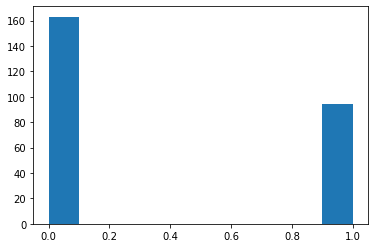

Variable Wiek:


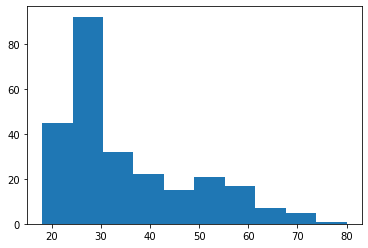

Variable Wsparcie:


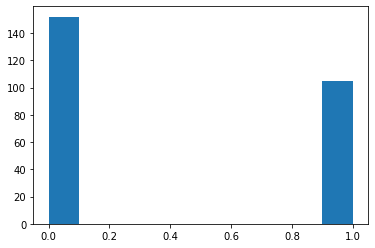

Variable SE:


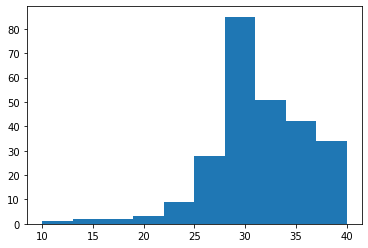

Variable Przekonania_kulturowe:


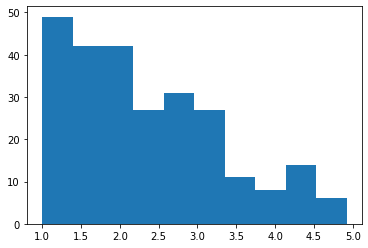

Variable Przekonania_ekonomiczne:


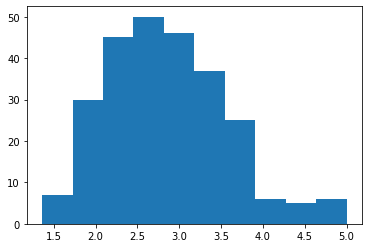

Variable Fundamentalizm_religijny:


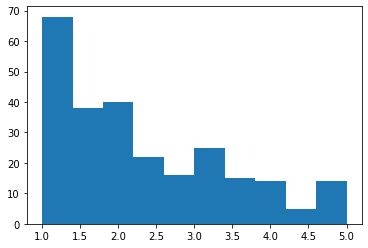

Variable Ksenofobia:


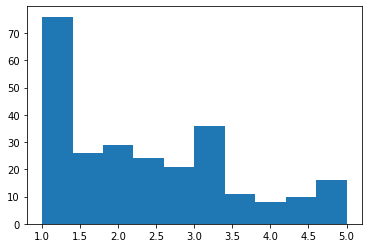

Variable Akceptacja_kapitalizmu:


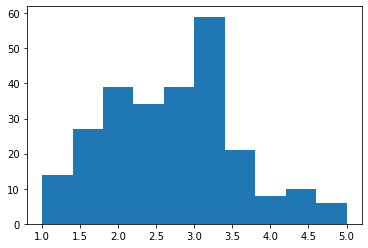

Variable Antyinterwencjonizm:


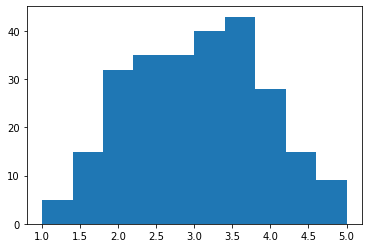

In [6]:
cols = ["Plec", "Wiek", "Wsparcie", "SE", "Przekonania_kulturowe", "Przekonania_ekonomiczne",
         "Fundamentalizm_religijny", "Ksenofobia", 'Akceptacja_kapitalizmu', 'Antyinterwencjonizm']

for col in cols:
    print(f"Variable {col}:")
    plt.hist(df[col], bins=10)
    plt.show()

<br>
<font size="5">Self-Efficacy vs. Economic views (correlation on the whole dataset):</font>

Pearson's r: 0.06
p-value: 0.37


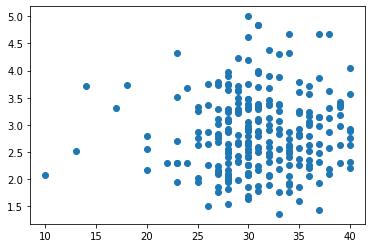

In [7]:
plt.scatter(x = df["SE"], y = df["Przekonania_ekonomiczne"])
cor = stats.pearsonr(df["SE"], df["Przekonania_ekonomiczne"])[0]
cor_p = stats.pearsonr(df["SE"], df["Przekonania_ekonomiczne"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")

Pearson's r: 0.06
p-value: 0.32


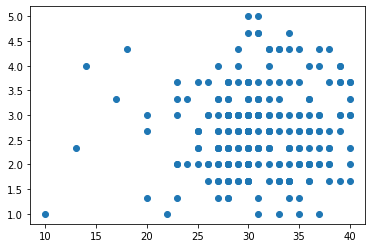

In [8]:
plt.scatter(x = df["SE"], y = df["Akceptacja_kapitalizmu"])
cor = stats.pearsonr(df["SE"], df["Akceptacja_kapitalizmu"])[0]
cor_p = stats.pearsonr(df["SE"], df["Akceptacja_kapitalizmu"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")

Pearson's r: 0.03
p-value: 0.61


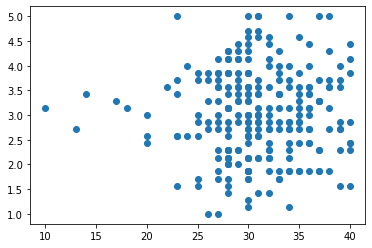

In [9]:
plt.scatter(x = df["SE"], y = df["Antyinterwencjonizm"])
cor = stats.pearsonr(df["SE"], df["Antyinterwencjonizm"])[0]
cor_p = stats.pearsonr(df["SE"], df["Antyinterwencjonizm"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")

<br>
<font size="5">Sex differences - SE vs. Economic Views:</font>

Pearson's r: 0.18
p-value: 0.08


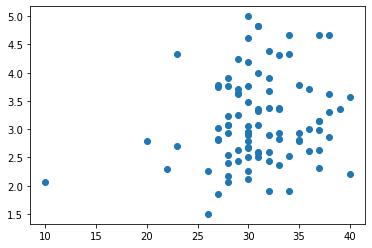

In [10]:
df_men = df[df["Plec"] == 1]
plt.scatter(x = df_men["SE"], y = df_men["Przekonania_ekonomiczne"])
cor = stats.pearsonr(df_men["SE"], df_men["Przekonania_ekonomiczne"])[0]
cor_p = stats.pearsonr(df_men["SE"], df_men["Przekonania_ekonomiczne"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")

Pearson's r: -0.03
p-value: 0.74


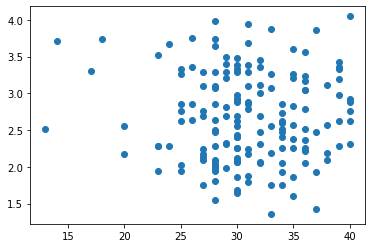

In [11]:
df_women = df[df["Plec"] == 0]
plt.scatter(x = df_women["SE"], y = df_women["Przekonania_ekonomiczne"])
cor = stats.pearsonr(df_women["SE"], df_women["Przekonania_ekonomiczne"])[0]
cor_p = stats.pearsonr(df_women["SE"], df_women["Przekonania_ekonomiczne"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")

<br>
<font size="5">Coherent views + Sex: SE vs. Economic Views:</font>

Spojne poglady:

Pearson's r: 0.09
p-value: 0.33


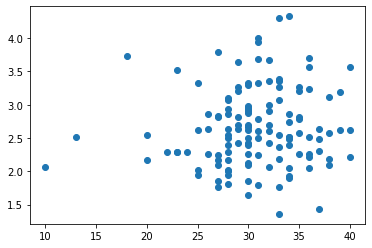

Niespojne poglady:

Pearson's r: 0.01
p-value: 0.95


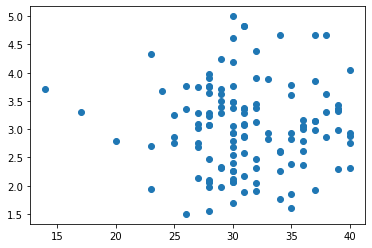

In [12]:
df["Poglady_diff"] = abs(df["Przekonania_kulturowe"] - df["Przekonania_ekonomiczne"])

mediana = np.median(df["Poglady_diff"])
    
df_spojne = df[df["Poglady_diff"] <= mediana]
    
print("Spojne poglady:")
print()
cor = stats.pearsonr(df_spojne["SE"], df_spojne["Przekonania_ekonomiczne"])[0]
cor_p = stats.pearsonr(df_spojne["SE"], df_spojne["Przekonania_ekonomiczne"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")
plt.scatter(x = df_spojne["SE"], y = df_spojne["Przekonania_ekonomiczne"])
plt.show()
    
df_niespojne = df[df["Poglady_diff"] > mediana]

print("Niespojne poglady:")
print()
cor = stats.pearsonr(df_niespojne["SE"], df_niespojne["Przekonania_ekonomiczne"])[0]
cor_p = stats.pearsonr(df_niespojne["SE"], df_niespojne["Przekonania_ekonomiczne"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")
plt.scatter(x = df_niespojne["SE"], y = df_niespojne["Przekonania_ekonomiczne"])
plt.show()

0
Spojne poglady:

Pearson's r: 0.01
p-value: 0.93


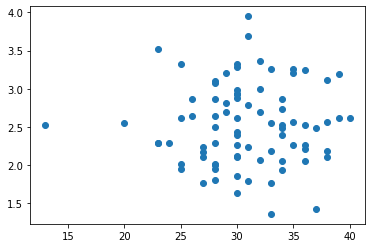

0
Niespojne poglady:

Pearson's r: -0.06
p-value: 0.57


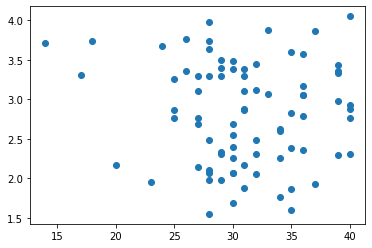

1
Spojne poglady:

Pearson's r: 0.29
p-value: 0.04


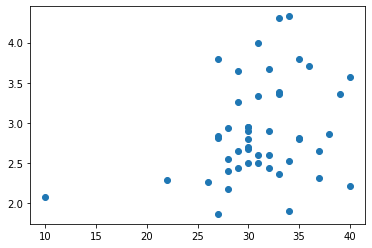

1
Niespojne poglady:

Pearson's r: 0.13
p-value: 0.37


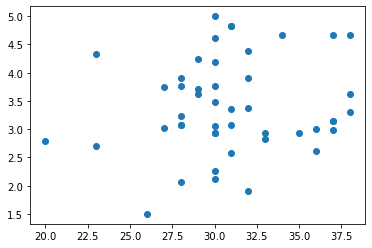

In [13]:
plec = [0,1]

for pl in plec:
    df_pl = df[df["Plec"] == pl]
    mediana = np.median(df_pl["Poglady_diff"])
    
    df_spojne = df_pl[df_pl["Poglady_diff"] <= mediana]
    
    print(pl)
    print("Spojne poglady:")
    print()
    cor = stats.pearsonr(df_spojne["SE"], df_spojne["Przekonania_ekonomiczne"])[0]
    cor_p = stats.pearsonr(df_spojne["SE"], df_spojne["Przekonania_ekonomiczne"])[1]
    print(f"Pearson's r: {np.around(cor, 2)}")
    print(f"p-value: {np.around(cor_p, 2)}")
    plt.scatter(x = df_spojne["SE"], y = df_spojne["Przekonania_ekonomiczne"])
    plt.show()
    
    df_niespojne = df_pl[df_pl["Poglady_diff"] > mediana]

    print(pl)
    print("Niespojne poglady:")
    print()
    cor = stats.pearsonr(df_niespojne["SE"], df_niespojne["Przekonania_ekonomiczne"])[0]
    cor_p = stats.pearsonr(df_niespojne["SE"], df_niespojne["Przekonania_ekonomiczne"])[1]
    print(f"Pearson's r: {np.around(cor, 2)}")
    print(f"p-value: {np.around(cor_p, 2)}")
    plt.scatter(x = df_niespojne["SE"], y = df_niespojne["Przekonania_ekonomiczne"])
    plt.show()

<br>
<font size="5">Coherent views + Sex: SE vs. Capitalism acceptance:</font>

Spojne poglady:

Pearson's r: 0.1
p-value: 0.26


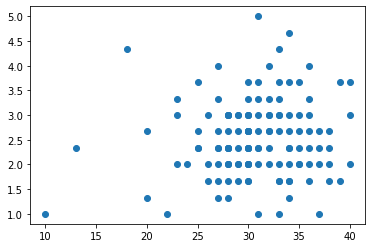

Niespojne poglady:

Pearson's r: 0.01
p-value: 0.94


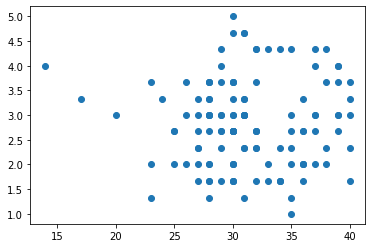

In [14]:
df["Poglady_diff"] = abs(df["Przekonania_kulturowe"] - df["Przekonania_ekonomiczne"])

mediana = np.median(df["Poglady_diff"])
    
df_spojne = df[df["Poglady_diff"] <= mediana]
    
print("Spojne poglady:")
print()
cor = stats.pearsonr(df_spojne["SE"], df_spojne["Akceptacja_kapitalizmu"])[0]
cor_p = stats.pearsonr(df_spojne["SE"], df_spojne["Akceptacja_kapitalizmu"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")
plt.scatter(x = df_spojne["SE"], y = df_spojne["Akceptacja_kapitalizmu"])
plt.show()
    
df_niespojne = df[df["Poglady_diff"] > mediana]

print("Niespojne poglady:")
print()
cor = stats.pearsonr(df_niespojne["SE"], df_niespojne["Akceptacja_kapitalizmu"])[0]
cor_p = stats.pearsonr(df_niespojne["SE"], df_niespojne["Akceptacja_kapitalizmu"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")
plt.scatter(x = df_niespojne["SE"], y = df_niespojne["Akceptacja_kapitalizmu"])
plt.show()

0
Spojne poglady:

Pearson's r: -0.01
p-value: 0.92


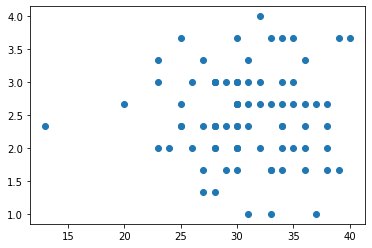

0
Niespojne poglady:

Pearson's r: 0.0
p-value: 1.0


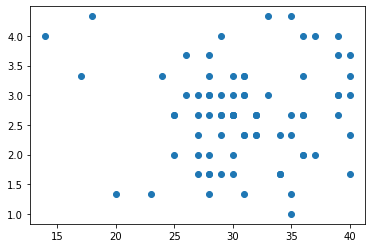

1
Spojne poglady:

Pearson's r: 0.32
p-value: 0.03


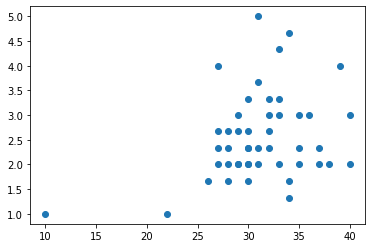

1
Niespojne poglady:

Pearson's r: 0.02
p-value: 0.92


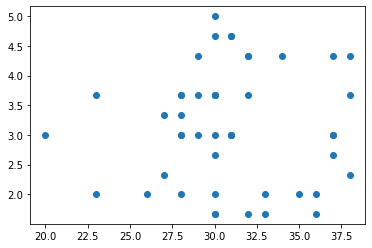

In [15]:
plec = [0,1]

for pl in plec:
    df_pl = df[df["Plec"] == pl]
    mediana = np.median(df_pl["Poglady_diff"])
    
    df_spojne = df_pl[df_pl["Poglady_diff"] <= mediana]
    
    print(pl)
    print("Spojne poglady:")
    print()
    cor = stats.pearsonr(df_spojne["SE"], df_spojne["Akceptacja_kapitalizmu"])[0]
    cor_p = stats.pearsonr(df_spojne["SE"], df_spojne["Akceptacja_kapitalizmu"])[1]
    print(f"Pearson's r: {np.around(cor, 2)}")
    print(f"p-value: {np.around(cor_p, 2)}")
    plt.scatter(x = df_spojne["SE"], y = df_spojne["Akceptacja_kapitalizmu"])
    plt.show()
    
    df_niespojne = df_pl[df_pl["Poglady_diff"] > mediana]

    print(pl)
    print("Niespojne poglady:")
    print()
    cor = stats.pearsonr(df_niespojne["SE"], df_niespojne["Akceptacja_kapitalizmu"])[0]
    cor_p = stats.pearsonr(df_niespojne["SE"], df_niespojne["Akceptacja_kapitalizmu"])[1]
    print(f"Pearson's r: {np.around(cor, 2)}")
    print(f"p-value: {np.around(cor_p, 2)}")
    plt.scatter(x = df_niespojne["SE"], y = df_niespojne["Akceptacja_kapitalizmu"])
    plt.show()

<br>
<font size="5">Coherent views + Sex: SE vs. Anti-Interventionism:</font>

Spojne poglady:

Pearson's r: 0.09
p-value: 0.56


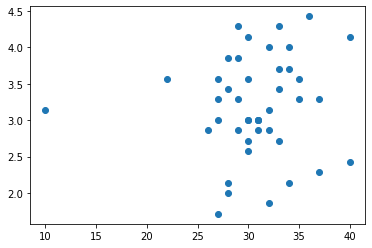

Niespojne poglady:

Pearson's r: 0.18
p-value: 0.21


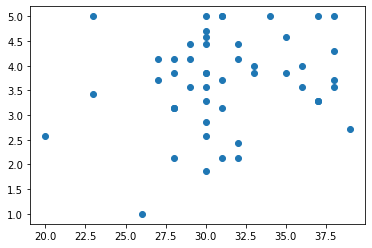

In [16]:
mediana = np.median(df["Poglady_diff"])
    
df_spojne = df_pl[df_pl["Poglady_diff"] <= mediana]
    
print("Spojne poglady:")
print()
cor = stats.pearsonr(df_spojne["SE"], df_spojne["Antyinterwencjonizm"])[0]
cor_p = stats.pearsonr(df_spojne["SE"], df_spojne["Antyinterwencjonizm"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")
plt.scatter(x = df_spojne["SE"], y = df_spojne["Antyinterwencjonizm"])
plt.show()
    
df_niespojne = df_pl[df_pl["Poglady_diff"] > mediana]

print("Niespojne poglady:")
print()
cor = stats.pearsonr(df_niespojne["SE"], df_niespojne["Antyinterwencjonizm"])[0]
cor_p = stats.pearsonr(df_niespojne["SE"], df_niespojne["Antyinterwencjonizm"])[1]
print(f"Pearson's r: {np.around(cor, 2)}")
print(f"p-value: {np.around(cor_p, 2)}")
plt.scatter(x = df_niespojne["SE"], y = df_niespojne["Antyinterwencjonizm"])
plt.show()

0
Spojne poglady:

Pearson's r: 0.03
p-value: 0.81


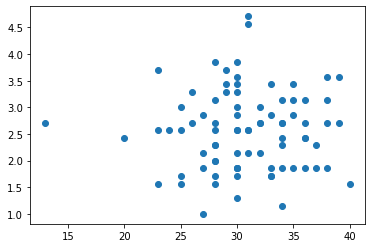

0
Niespojne poglady:

Pearson's r: -0.1
p-value: 0.36


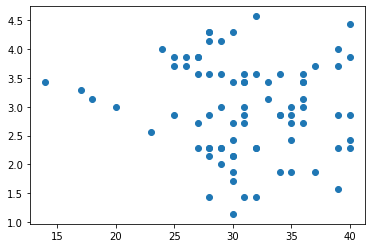

1
Spojne poglady:

Pearson's r: 0.11
p-value: 0.46


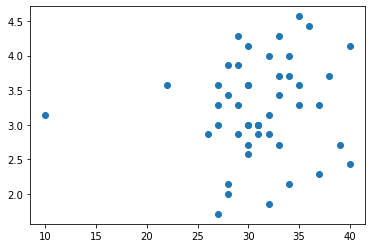

1
Niespojne poglady:

Pearson's r: 0.22
p-value: 0.14


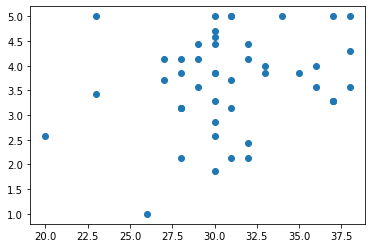

In [17]:
plec = [0,1]

for pl in plec:
    df_pl = df[df["Plec"] == pl]
    mediana = np.median(df_pl["Poglady_diff"])
    
    df_spojne = df_pl[df_pl["Poglady_diff"] <= mediana]
    
    print(pl)
    print("Spojne poglady:")
    print()
    cor = stats.pearsonr(df_spojne["SE"], df_spojne["Antyinterwencjonizm"])[0]
    cor_p = stats.pearsonr(df_spojne["SE"], df_spojne["Antyinterwencjonizm"])[1]
    print(f"Pearson's r: {np.around(cor, 2)}")
    print(f"p-value: {np.around(cor_p, 2)}")
    plt.scatter(x = df_spojne["SE"], y = df_spojne["Antyinterwencjonizm"])
    plt.show()
    
    df_niespojne = df_pl[df_pl["Poglady_diff"] > mediana]

    print(pl)
    print("Niespojne poglady:")
    print()
    cor = stats.pearsonr(df_niespojne["SE"], df_niespojne["Antyinterwencjonizm"])[0]
    cor_p = stats.pearsonr(df_niespojne["SE"], df_niespojne["Antyinterwencjonizm"])[1]
    print(f"Pearson's r: {np.around(cor, 2)}")
    print(f"p-value: {np.around(cor_p, 2)}")
    plt.scatter(x = df_niespojne["SE"], y = df_niespojne["Antyinterwencjonizm"])
    plt.show()